In [19]:
import osmnx as ox

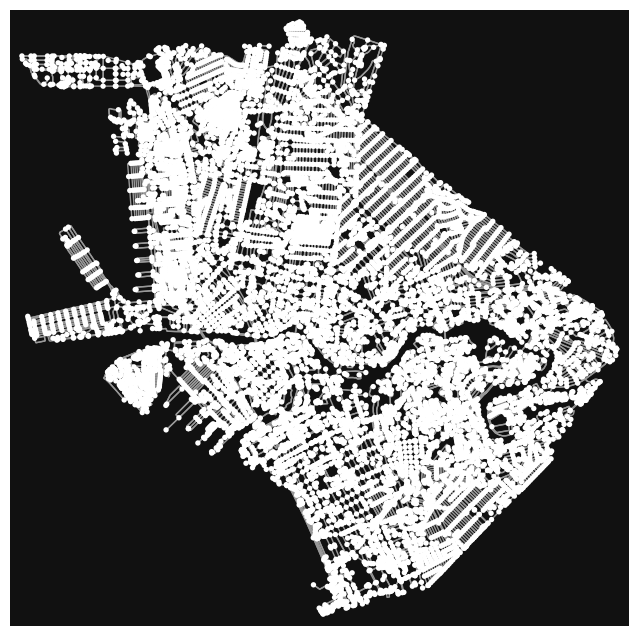

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [20]:
road1 = ox.graph_from_place("Manila, Philippines")
ox.plot_graph(road1)

In [22]:
ox.save_graph_geopackage(road1, filepath="road1.gpkg")

C:\Users\User\Documents\Anaconda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'road1.gpkg': 'nodes' (default), 'edges'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

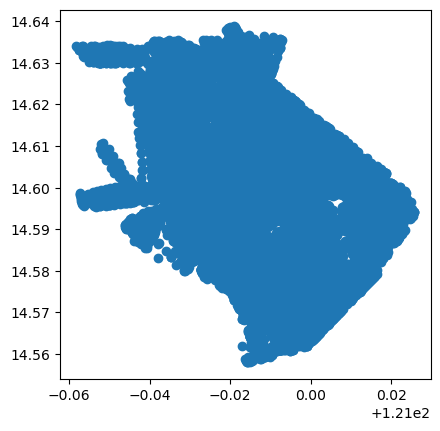

In [23]:
import geopandas as gpd
polygon = gpd.read_file(r"C:\Users\User\OJT UP Diliman\road1.gpkg")
polygon.plot()

<Axes: >

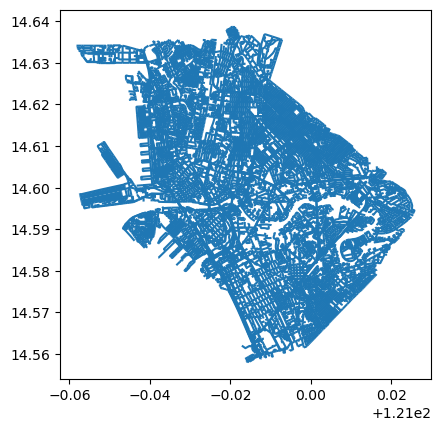

In [29]:
edges = gpd.read_file("road1.gpkg", layer='edges')
edges.plot()

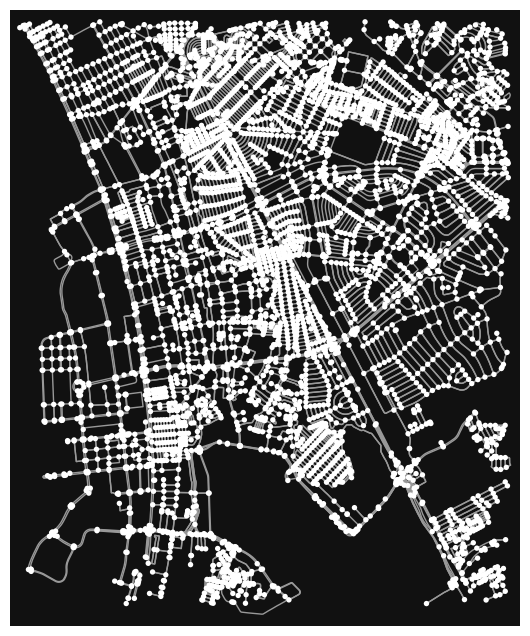

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [30]:
road2 = ox.graph_from_point((14.544346158602735, 121.00197166456081), dist = 4000, network_type = "drive" )
ox.plot_graph(road2)

In [31]:
from shapely.geometry import Polygon, MultiPolygon
print(type(study_area))

<class 'shapely.geometry.point.Point'>


In [33]:
gdf = ox.geocode_to_gdf("Manila, Philippines")
polygon = gdf.loc[0, 'geometry']

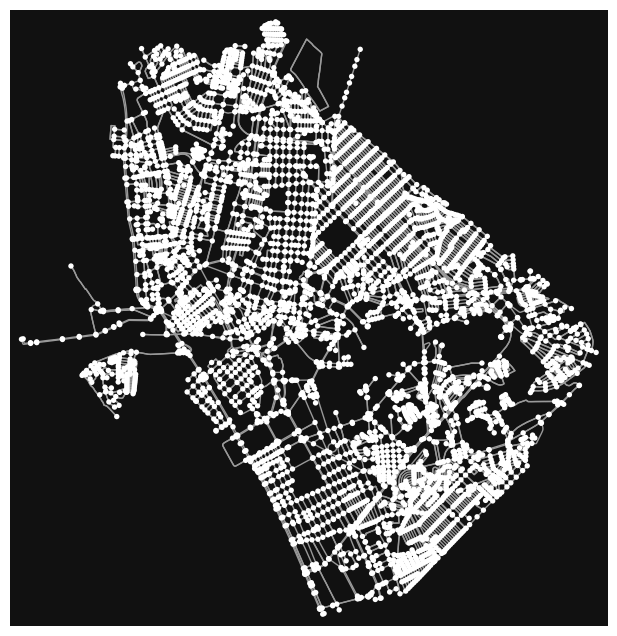

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [34]:
road3 = ox.graph_from_polygon(polygon, network_type="drive")
ox.plot_graph(road3)

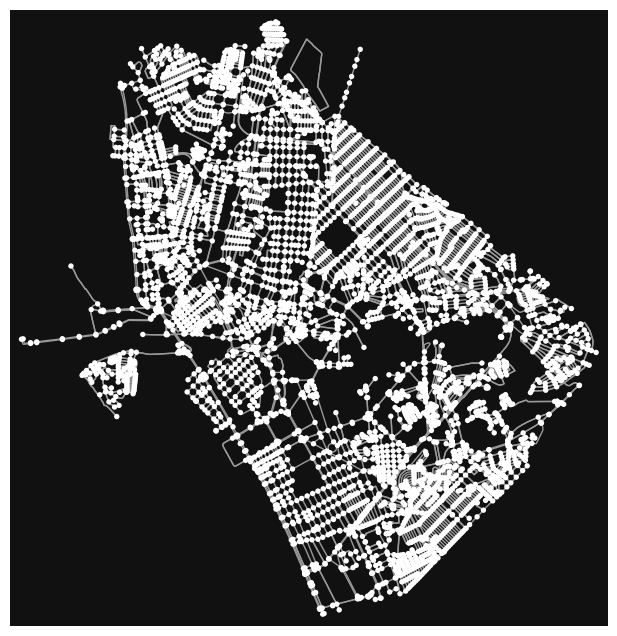

In [35]:
ox.settings.bidirectional_network_types += "drive"
G = ox.graph.graph_from_place("Manila, Philippines", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

In [36]:
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
12067330,14.559643,120.987132,traffic_signals,4,POINT (120.98713 14.55964)
12067342,14.583019,120.975553,traffic_signals,4,POINT (120.97555 14.58302)
12067373,14.583496,120.984162,traffic_signals,3,POINT (120.98416 14.5835)
12067395,14.604596,120.985385,motorway_junction,3,POINT (120.98539 14.6046)
21322188,14.570377,120.991556,traffic_signals,4,POINT (120.99156 14.57038)


In [37]:
G_proj = ox.projection.project_graph(G)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

47237669.36588161

In [38]:
ox.stats.basic_stats(G_proj, area =graph_area_m, clean_int_tol=15)

{'n': 5067,
 'm': 12752,
 'k_avg': 5.033353068877047,
 'edge_length_total': 1129993.749486437,
 'edge_length_avg': 88.61306065608822,
 'streets_per_node_avg': 3.0984803631340045,
 'streets_per_node_counts': {0: 0,
  1: 610,
  2: 26,
  3: 2743,
  4: 1639,
  5: 41,
  6: 8},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1203868166567989,
  2: 0.005131241365699625,
  3: 0.5413459640813104,
  4: 0.3234655614762187,
  5: 0.008091572922834024,
  6: 0.0015788434971383462},
 'intersection_count': 4457,
 'street_length_total': 705907.5598326088,
 'street_segment_count': 7790,
 'street_length_avg': 90.6171450362784,
 'circuity_avg': 1.0302814288600937,
 'self_loop_proportion': 0.0003851091142490372,
 'clean_intersection_count': 3328,
 'node_density_km': 107.26608801872318,
 'intersection_density_km': 94.3526651469211,
 'edge_density_km': 23921.4543108386,
 'street_density_km': 14943.74234183673,
 'clean_intersection_density_km': 70.4522480612415}

In [39]:
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [40]:
orig = ox.distance.nearest_nodes(G, X= 120.97733825716722, Y= 14.590933161902356)
dest = ox.distance.nearest_nodes(G, X= 120.97092803892463, Y=14.592847804527935)

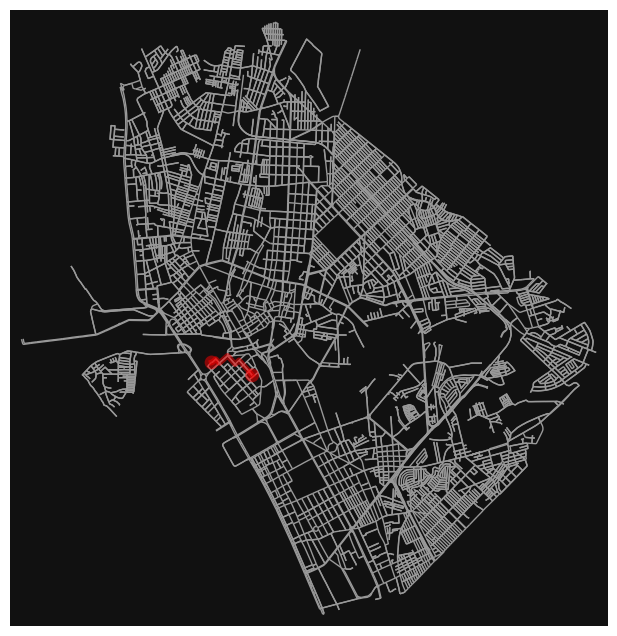

In [41]:
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)

In [42]:
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

881

In [43]:
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

638

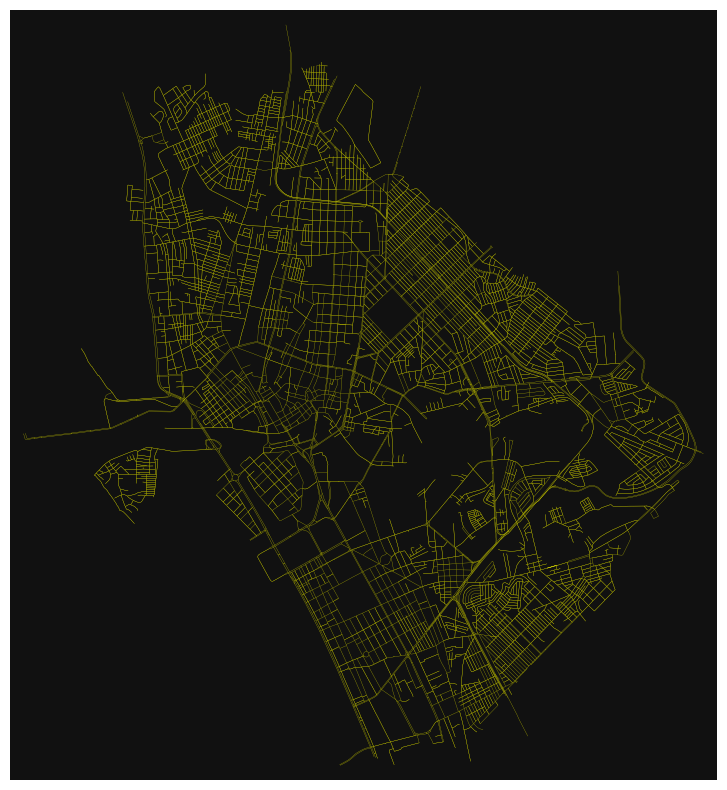

In [44]:
place = {"city": "Manila", "country": "Philippines"}
G = ox.graph.graph_from_place(place, network_type = "drive", truncate_by_edge = True)
fig, ax = ox.plot.plot_graph(G, figsize = (10,10), node_size= 0, edge_color= "y", edge_linewidth = 0.2)

In [45]:
place = "Manila, Philippines"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(105999, 360)

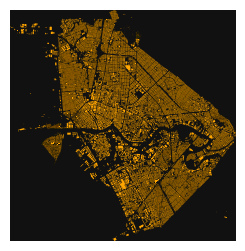

In [46]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

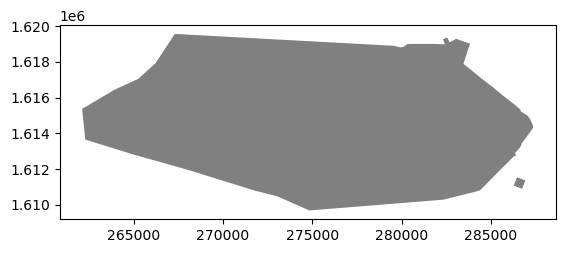

In [47]:
city = ox.geocoder.geocode_to_gdf("Manila, Philippines")
city_proj = ox.projection.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis()

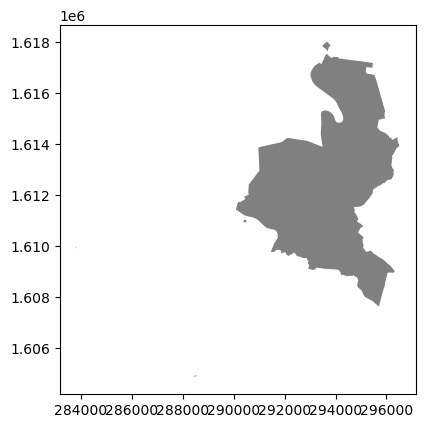

In [48]:
place_names = ["Makati City, Philippines",
               "Taguig City, Philippines",
               "Pasig City, Philippines",
               "Marikina City, Philippines",
               "Pasay City, Philippines"]
east_bay = ox.geocoder.geocode_to_gdf(place_names)
east_bay = ox.projection.project_gdf(east_bay)
ax = east_bay.plot(fc="gray")
_ = ax.axis()

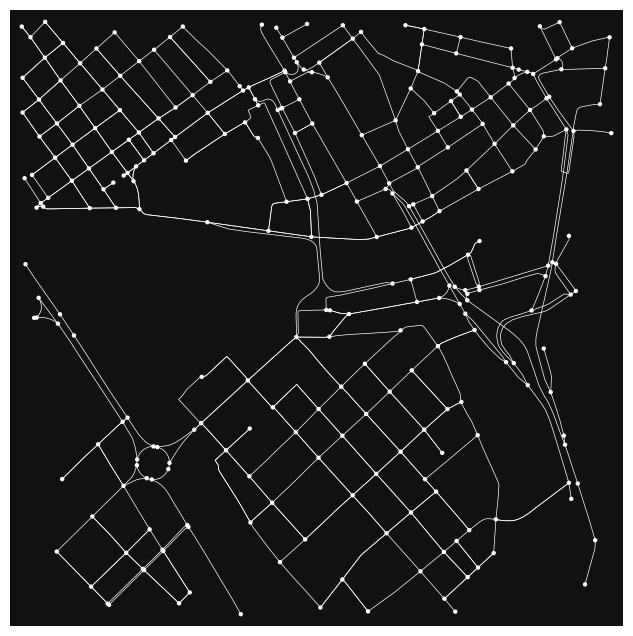

In [49]:
location_point = ( 14.59414975178241,120.97464754937477)
G = ox.graph.graph_from_point(location_point, dist = 750, dist_type="bbox", network_type="drive")
fig, ax = ox.plot.plot_graph(G, node_size=10, edge_color="w", edge_linewidth=0.5)